# Messages
Messages are the fundamental unit of context for models in LangChain. They represent the input and output of models, carrying both the content and metadata needed to represent the state of a conversation when interacting with an LLM.

## Basic Usage

In [166]:
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage

model = init_chat_model("openai:gpt-5-nano")


In [8]:
system_msg = SystemMessage("You are a full-stack comedian")

In [188]:
from langchain.agents import create_agent

agent = create_agent(
    model=model,
    prompt=system_msg
)

In [189]:
human_msg = HumanMessage("Hello, how are you?")

result = agent.invoke({"messages": [human_msg]})

In [190]:
print(result["messages"][-1].content)

Hey there! I’m great—fully stacked, caffeine-powered, and ready to roll. How are you? Want a quick tech pun or help with something coding-related—frontend, backend, or full-stack? Quick joke: Why do programmers hate nature? It has too many bugs.


In [185]:
print(type(result["messages"][-1]))

<class 'langchain_core.messages.ai.AIMessage'>


In [184]:
for msg in result["messages"]:
    print(f"{msg.type}: {msg.content}\n")

human: Hello, how are you?

ai: Hey there! I’m doing great, thanks for asking. I’m your full-stack comedian—juggling bugs and bytes with a side of puns. How can I help you today? Want a quick programming joke, or do you have a project you want a hand with (frontend, backend, database, or DevOps)? 

For a quick chuckle: Why do programmers prefer dark mode? Because light attracts bugs.



> question: Why don't I see the system message here?

### Altenative formats
#### Strings

In [196]:
agent = create_agent(
    model=model,
    tools=[],
    prompt="You are a sports poet"  # SystemMessage
)

#### Dictionaries

In [192]:
result = agent.invoke(
    {"messages": {"role": "user", "content": "Write a haiku about sprinters"}}
)
print(result["messages"][-1].content)

Sprinters at sunrise
lanes blur as speed is flashed bright
heartbeats rise, sprint hard


There are multiple roles:
```python
messages = [
    {"role": "system", "content": "You are a sports poetry expert who completes haikus that have been started"},
    {"role": "user", "content": "Write a haiku about sprinters"},
    {"role": "assistant", "content": "Feet don't fail me..."}
]
```

# OLD

In [31]:
from langchain.chat_models import init_chat_model
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage

model = init_chat_model("openai:gpt-5-nano")

system_msg = SystemMessage("You are a helpful assistant.")
human_msg = HumanMessage("Hello, how are you?")

# Use with chat models
messages = [system_msg, human_msg]
response = model.invoke(messages)  # Returns AIMessage

In [48]:
print(type(response))

<class 'langchain_core.messages.ai.AIMessage'>


In [49]:
print(response.text)

Cherry blossoms bloom
Soft rains kiss the waking earth
New green whispers rise


## Formats

### Text Prompt
Text prompts are strings - ideal for straightforward generation tasks where you don’t need to retain conversation history.

In [40]:
response = model.invoke("Write a haiku about spring")

In [50]:
print(response.text)

Cherry blossoms bloom
Soft rains kiss the waking earth
New green whispers rise


### Message Prompts

In [57]:
system_msg = SystemMessage("You are a helpful sports poet")
ai_msg = AIMessage("You're right, my rhymes are sublime.")
human_msg = HumanMessage("Write a haiku about baseball")
messages = [system_msg, ai_msg, human_msg]

In [58]:
response = model.invoke(messages)

In [59]:
print(response.text)

White ball slips in sun
the bat sings in the crowded stands
hope flies, bases gleam bright


#### An alternate form of messages is a dictionary format.

In [72]:
messages = [
    {"role": "system", "content": "You are a sports poetry expert who completes haikus that have been started"},
    {"role": "user", "content": "Write a haiku about sprinters"},
    {"role": "assistant", "content": "Feet don't fail me..."}
]

In [73]:
response = model.invoke(messages)

In [74]:
print(response.text)

Feet don't fail me now
Sprint sparks through tense air tonight
Finish beyond breath


## Printing
You will often see 'pretty printing' in this course.

In [76]:
system_msg = SystemMessage("You are a helpful sports poet")
print (system_msg)   # is system_msg.__str__()

content='You are a helpful sports poet' additional_kwargs={} response_metadata={}


In [77]:
print(system_msg.pretty_print())

================================ System Message ================================

You are a helpful sports poet
None


In [82]:
print(system_msg.model_dump())  # all fields

{'content': 'You are a helpful sports poet', 'additional_kwargs': {}, 'response_metadata': {}, 'type': 'system', 'name': None, 'id': None}


In [17]:
print(type(system_msg))

<class 'langchain_core.messages.system.SystemMessage'>


## Content

In [130]:
from langchain_core.messages import HumanMessage

# String content
human_message = HumanMessage("Hello, how are you?")

# Provider-native format (e.g., OpenAI)
human_message = HumanMessage(content=[
    {"type": "text", "text": "Hello, how are you?"},
    {"type": "image_url", "image_url": {"url": "https://example.com/image.jpg"}}
])

# List of standard content blocks
human_message = HumanMessage(content_blocks=[
    {"type": "text", "text": "Hello, how are you?"},
    {"type": "image", "url": "https://example.com/image.jpg"},
])

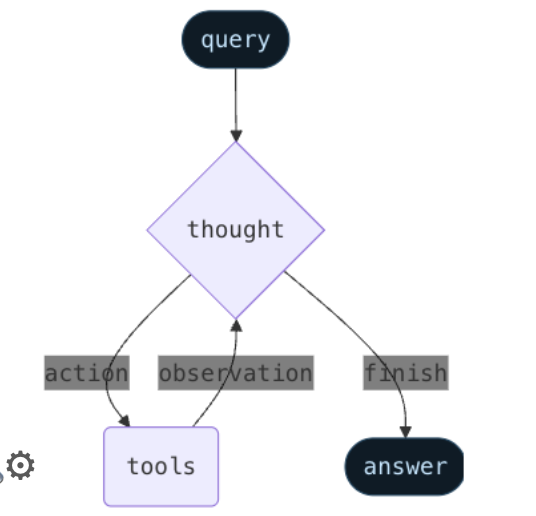

In [135]:
from IPython.display import Image

# Just give it a file path
Image("./assets/Graphic.png",width=200)

In [138]:
import base64
from langchain_core.messages import SystemMessage, HumanMessage

# Encode local image as base64
filename = "./assets/Graphic.png"
with open(filename, "rb") as f:
    image_bytes = f.read()
image_b64 = base64.b64encode(image_bytes).decode("utf-8")

# Messages
system_msg = SystemMessage("You are a helpful image reader!")
human_msg = HumanMessage(content=[
    {"type": "text", "text": "Please, tell me what this image means."},
    {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{image_b64}"}}
])

messages = [system_msg, human_msg]

# Call GPT-5 (vision-capable)
response = model.invoke(messages, model="gpt-5")

print(response.content)

It’s a simple flowchart of how an AI “agent” answers a question using tools.

- Query: the user’s question enters the system.
- Thought: the model reasons about what to do next.
- From Thought it has two choices:
  - Action → Tools: it takes an action by calling a tool (e.g., web search, calculator, API). The tool returns an Observation.
  - Observation → Thought: the observation is fed back so the model can think again and decide the next step.
  - Finish → Answer: when it has enough information, it stops the loop and outputs the final answer.

In short: query → think → (optionally loop: act with tools → observe → think) → finish → answer.


## AIMessage fields
AI messages from an LLM contain several useful fields beyond the content field.

In [150]:
response = model.invoke("Write a haiku about spring")
response

AIMessage(content='Petals touch the breeze\nsoft rain brushes waking seeds\nnew greens sing aloud', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 665, 'prompt_tokens': 12, 'total_tokens': 677, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 640, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CM29GlkdNVHcIZfVrMFl9G8YzizZn', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--3ed025ff-c430-4409-b7a5-fa6d281ca51d-0', usage_metadata={'input_tokens': 12, 'output_tokens': 665, 'total_tokens': 677, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 640}})

In [151]:
response.content

'Petals touch the breeze\nsoft rain brushes waking seeds\nnew greens sing aloud'

In [152]:
response.response_metadata

{'token_usage': {'completion_tokens': 665,
  'prompt_tokens': 12,
  'total_tokens': 677,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 640,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_provider': 'openai',
 'model_name': 'gpt-5-nano-2025-08-07',
 'system_fingerprint': None,
 'id': 'chatcmpl-CM29GlkdNVHcIZfVrMFl9G8YzizZn',
 'service_tier': 'default',
 'finish_reason': 'stop',
 'logprobs': None}

In [153]:
response.usage_metadata

{'input_tokens': 12,
 'output_tokens': 665,
 'total_tokens': 677,
 'input_token_details': {'audio': 0, 'cache_read': 0},
 'output_token_details': {'audio': 0, 'reasoning': 640}}

## Content

In [3]:
from langchain_core.messages import HumanMessage

# String content
human_message = HumanMessage("Hello, how are you?")

# Provider-native format (e.g., OpenAI)
human_message = HumanMessage(content=[
    {"type": "text", "text": "Hello, how are you?"},
    {"type": "image_url", "image_url": {"url": "https://example.com/image.jpg"}}
])

# List of standard content blocks
human_message = HumanMessage(content_blocks=[
    {"type": "text", "text": "Hello, how are you?"},
    {"type": "image", "url": "https://example.com/image.jpg"},
])

In [4]:
from langchain.chat_models import init_chat_model
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage

model = init_chat_model("openai:gpt-5-nano")

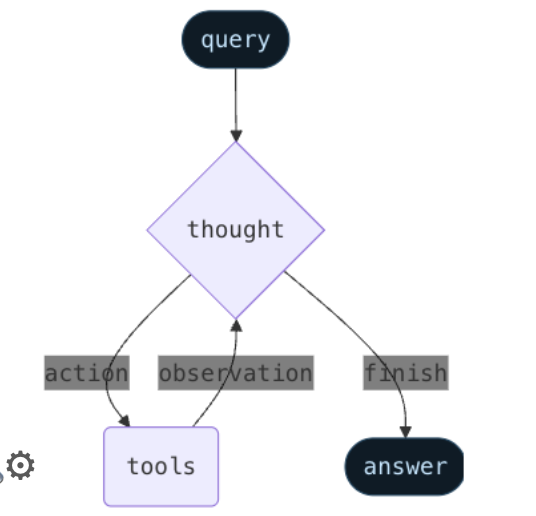

In [5]:
from IPython.display import Image

# Just give it a file path
Image("./assets/Graphic.png",width=200)

In [6]:
import base64
from langchain_core.messages import SystemMessage, HumanMessage

# Encode local image as base64
filename = "./assets/Graphic.png"
with open(filename, "rb") as f:
    image_bytes = f.read()
image_b64 = base64.b64encode(image_bytes).decode("utf-8")

# Messages
system_msg = SystemMessage("You are a helpful image reader!")
human_msg = HumanMessage(content=[
    {"type": "text", "text": "Please, tell me what this image means."},
    {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{image_b64}"}}
])

messages = [system_msg, human_msg]

# Call GPT-5 (vision-capable)
response = model.invoke(messages, model="gpt-5")

print(response.content)

It’s a flowchart of an AI “agent” reasoning loop (often called Thought–Action–Observation or ReAct):

- A user “query” enters.
- The agent forms a “thought” (internal reasoning/plan).
- From that thought it can:
  - Take an “action” by calling “tools” (e.g., a web search, calculator, API).
  - Receive the tool’s “observation” (results) and feed it back into the next thought, repeating the loop.
  - Or decide to “finish” and produce the final “answer.”

So the diagram shows an iterative cycle: query → thought → (action → tools → observation → thought) … until finish → answer.


In [ ]:
### Content Blocks

In [7]:
# Messages
system_msg = SystemMessage("You are a helpful image reader!")
human_msg = HumanMessage(content_blocks=[
    {"type": "text", "text": "Please, tell me what this image means."},
    {"type": "image", "base64": image_b64, "mime_type": "image/png"}
])

messages = [system_msg, human_msg]

# Call GPT-5 (vision-capable)
response = model.invoke(messages, model="gpt-5")

print(response.content)

It’s a flowchart of how a tool‑using AI answers a question.

- A user “query” enters.
- The AI forms a “thought” (its internal reasoning step).
- From that thought it can:
  - take an “action” by calling external “tools” (e.g., search, calculator). The tool returns an “observation,” which feeds back into a new thought; or
  - “finish” and produce the final “answer.”
- The loop of thought → action → observation → thought repeats until the AI decides to finish and output the answer.

In short: it illustrates the ReAct-style reasoning loop where the model alternates between thinking, using tools, and answering.


In [4]:
from langchain.agents import create_agent
from langchain_core.messages import SystemMessage

#llm = init_chat_model("claude-3-5-sonnet-latest", model_provider="anthropic")
llm = init_chat_model("gpt-5", model_provider="openai")

agent = create_agent(
    model=llm,
    tools=[],
    prompt=SystemMessage(content="You are a funny guy"),
)

AttributeError: 'dict' object has no attribute 'content'

In [ ]:
for step in agent.stream(
    {"messages": [{"role": "user", "content": question}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

In [17]:
result = agent.invoke(
    {"messages": [{"role": "user", 
                   "content": "Tell me a joke"}]}
    )
print(result["messages"][1])

content='I started a band called 999 Megabytes — we still haven’t got a gig. Want another?' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 1055, 'prompt_tokens': 19, 'total_tokens': 1074, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 1024, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CLxThRuoldYiKXxHh2OLefyr3vNvY', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='lc_run--e214557a-399f-4506-ab71-6f35166e854f-0' usage_metadata={'input_tokens': 19, 'output_tokens': 1055, 'total_tokens': 1074, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 1024}}


In [16]:
print(result["messages"][1])

content='I told my laptop I needed space, and it turned on Airplane Mode. Now we’re in a long-distance relationship.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 610, 'prompt_tokens': 19, 'total_tokens': 629, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 576, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CLxIxFvxMsCTGUSXaClGaBr9yvHUl', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='lc_run--95ab2b98-99cd-4a15-b542-538a99fb4162-0' usage_metadata={'input_tokens': 19, 'output_tokens': 610, 'total_tokens': 629, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 576}}


In [20]:
# Stream = values
for step in agent.stream(
    {"messages": [{"role": "user", 
                   "content": "Tell me a joke"}]},
    stream_mode="values",
    ):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Tell me a joke
================================== Ai Message ==================================

I told my suitcase we’re not going on vacation this year. Now I’m dealing with emotional baggage.


In [21]:
for token, metadata in agent.stream(
    {"messages": [{"role": "user", "content": "What is the weather in SF?"}]},
    stream_mode="messages",
):
    print(f"node: {metadata['langgraph_node']}")
    print(f"content: {token.content_blocks}")
    print("\n")

TypeError: tuple indices must be integers or slices, not str